### Setting up for kaggle

Data can be found at [Kaggle](https://www.kaggle.com/competitions/automatic-vote-counting-image)
Add the ".kaggle.json" file in the root directory and run the nootbook.

In [ ]:
"""
!pip install -q kaggle
! mkdir ~/.kaggle 
! cp ./kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
"""

ref                                                 title                                  size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                  Data Science Job Salaries               7KB  2022-06-15 08:59:12          18456        576  1.0              
nancyalaswad90/diamonds-prices                      Diamonds Prices                       711KB  2022-07-09 14:59:21           2135         94  1.0              
aravindas01/monkeypox-cases-countrywise-data        MonkeyPox Cases_Countrywise Data        6KB  2022-08-10 17:12:36            602         33  0.9117647        
faryarmemon/usa-housing-market-factors              U.S. Housing Market Factors            32KB  2022-08-03 02:19:31            473         33  1.0              
himanshunakrani/student-stud

### Downloading and unzipping data
Designed for kaggle and google colab

In [ ]:
"""
! kaggle competitions download -c "automatic-vote-counting-image"
! apt install unzip
!unzip automatic-vote-counting-image 
"""

 99% 2.38G/2.40G [00:26<00:00, 76.6MB/s]
100% 2.40G/2.40G [00:26<00:00, 98.6MB/s]


In [ ]:
import shutil
import os
import pandas as pd
base_dir = "./IMAGE DATASET/train"
current_dir = "./train"

labels_path = "./IMAGE DATASET/train.csv"
train = pd.read_csv(labels_path)
train.head()

,data,label
0,12_248.jpeg,12
1,39_1627.jpeg,39
2,22_536.jpeg,22
3,33_612.jpeg,33
4,1_1158.jpeg,1


In [ ]:
# !mkdir train
!mkdir train_split
!mkdir validation_split
# !for i in {0..47}; do mkdir "train/$i"; done
!for i in {0..47}; do mkdir "train_split/$i"; done
!for i in {0..47}; do mkdir "validation_split/$i"; done

In [ ]:
import random
for i in range(91960):
    num = random.random()
    current_dir = "./train_split" if num < 0.9 else "./validation_split"
    file_name = train.iloc[i,0]
    label = train.iloc[i, 1]
    dst = os.path.join(current_dir, str(label))
    src = os.path.join(base_dir, file_name)
    shutil.copy(src, dst)
    
    if i % 5000 == 0:
        print(i)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000


In [ ]:
from keras_preprocessing.image import ImageDataGenerator

input_shape = [96, 96]
batch_size = 256

TRAINING_DIR = "./train_split"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=10,
      shear_range=0.1,
      )

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(input_shape[0],input_shape[1]),
	class_mode='categorical',
  batch_size=batch_size
)
VALIDATION_DIR = "./validation_split"
validation_datagen = ImageDataGenerator(
      rescale = 1./255,
      )

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(input_shape[0],input_shape[1]),
	class_mode='categorical',
  batch_size=batch_size
)

Found 82845 images belonging to 48 classes.
Found 9115 images belonging to 48 classes.


In [ ]:
import numpy as np
train_epoches = np.ceil(82814 / batch_size)
val_epoches = np.ceil(9146 / batch_size)


In [ ]:
# import tensorflow as tf

# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(212, 309, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     # tf.keras.layers.Dropout(0.5),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(48, activation='softmax')
# ])
# model.build()

# # Print the model summary
# model.summary()


In [ ]:
# import tensorflow as tf

# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(212, 309, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     # tf.keras.layers.Dropout(0.5),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(48, activation='softmax')
# ])
# model.summary()

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(input_shape[0], input_shape[1], 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(input_shape[0], input_shape[1], 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(48, activation='softmax')
])

# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 92, 92, 32)        9248      
                                                                 
 batch_normalization_12 (Bat  (None, 92, 92, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 46, 46, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 46, 46, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 44, 44, 64)       

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

model.compile(loss = 'categorical_crossentropy', optimizer=Adam(learning_rate=0.0001,
), metrics=['accuracy'])

checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')


In [ ]:
history = model.fit(train_generator, epochs=15, steps_per_epoch=train_epoches, verbose = 1, 
                    validation_data = validation_generator, validation_steps=val_epoches,
                    callbacks=[checkpoint]
                    )

Epoch 1/15
324/324 [==============================] - ETA: 0s - loss: 3.8388 - accuracy: 0.0287
Epoch 1: val_accuracy improved from -inf to 0.02644, saving model to model.h5
324/324 [==============================] - 520s 2s/step - loss: 3.8388 - accuracy: 0.0287 - val_loss: 34.8819 - val_accuracy: 0.0264
Epoch 2/15
324/324 [==============================] - ETA: 0s - loss: 2.4323 - accuracy: 0.3785
Epoch 2: val_accuracy improved from 0.02644 to 0.80230, saving model to model.h5
324/324 [==============================] - 532s 2s/step - loss: 2.4323 - accuracy: 0.3785 - val_loss: 0.5574 - val_accuracy: 0.8023
Epoch 3/15
324/324 [==============================] - ETA: 0s - loss: 0.1129 - accuracy: 0.9761
Epoch 3: val_accuracy did not improve from 0.80230
324/324 [==============================] - 534s 2s/step - loss: 0.1129 - accuracy: 0.9761 - val_loss: 0.8963 - val_accuracy: 0.7244
Epoch 4/15
324/324 [==============================] - ETA: 0s - loss: 0.0712 - accuracy: 0.9841
Epoch 4: 

In [ ]:
# !mkdir train_separated
# !mkdir validation

# import random

# !for i in {0..47}; do mkdir "train_separated/$i"; done
# !for i in {0..47}; do mkdir "validation/$i"; done
# for i in range(91960):

#   num = random.random()
#   current_dir = "./train_separated" if num < 0.8 else "./validation"
#   file_name = train.iloc[i,0]
#   label = train.iloc[i, 1]

#   dst = os.path.join(current_dir, str(label))
#   src = os.path.join(base_dir, file_name)
#   shutil.copy(src, dst)
    
#   if i % 5000 == 0:
#     print(i)

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

print(tf.version.VERSION)


In [ ]:
!mkdir ./IMAGE\ DATASET/test/0
!cp ./IMAGE\ DATASET/test/*.jpeg ./IMAGE\ DATASET/test/0

In [ ]:
from keras.preprocessing import image
import numpy as np


test_datagen = ImageDataGenerator(
      rescale = 1./255,
      )
test_data = "./IMAGE DATASET/test"

test_generator = test_datagen.flow_from_directory(
	test_data,
	target_size=(input_shape[0],input_shape[1]),
  batch_size=1,
	class_mode='categorical',
  shuffle=False
)



Found 4840 images belonging to 1 classes.


In [ ]:
pred=model.predict(test_generator,verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices

4840/4840 [==============================] - 34s 7ms/step


array([[5.57053974e-03, 9.94429350e-01, 1.06522587e-19, ...,
        1.64894370e-13, 4.26555357e-14, 1.77321922e-18],
       [5.43365240e-05, 4.55202144e-20, 2.40375485e-22, ...,
        5.99523903e-13, 1.71510704e-14, 2.00006952e-16],
       [1.20160446e-04, 2.00225791e-16, 9.47641105e-18, ...,
        9.99764621e-01, 3.95895768e-05, 3.78478851e-13],
       ...,
       [5.34295663e-02, 1.77294640e-25, 5.96401292e-13, ...,
        7.56190357e-20, 4.55967047e-16, 3.67021257e-12],
       [2.50531656e-07, 2.29014256e-28, 8.69629908e-25, ...,
        3.11408553e-17, 2.35799523e-28, 1.66009350e-30],
       [3.14785848e-06, 2.90077061e-30, 1.17944055e-29, ...,
        4.21899115e-13, 3.74597858e-23, 3.75587270e-27]], dtype=float32)

In [ ]:
sequence_map = {
    0: 0,
    1: 1,
    2: 10,
    3: 11,
    4: 12,
    5: 13,
    6: 14,
    7: 15,
    8: 16,
    9: 17,
    10: 18,
    11: 19,
    12: 2,
    13: 20,
    14: 21,
    15: 22,
    16: 23,
    17: 24,
    18: 25,
    19: 26,
    20: 27,
    21: 28,
    22: 29,
    23: 3,
    24: 30,
    25: 31,
    26: 32,
    27: 33,
    28: 34,
    29: 35,
    30: 36,
    31: 37,
    32: 38,
    33: 39,
    34: 4,
    35: 40,
    36: 41,
    37: 42,
    38: 43,
    39: 44,
    40: 45,
    41: 46,
    42: 47,
    43: 5,
    44: 6,
    45: 7,
    46: 8,
    47: 9
}

In [ ]:
# model2 = tf.keras.models.load_model("model_first.h5")
# pred=model2.predict_generator(test_generator,verbose=1)
# predicted_class_indices=np.argmax(pred,axis=1)
# predicted_class_indices

In [ ]:
data = []
i = 0
for file_name_path in test_generator.filenames:
  file_name = file_name_path[2:]
  data.append([file_name, sequence_map[predicted_class_indices[i]]])
  i = i + 1
  

In [ ]:
results = pd.DataFrame(data, columns=["data", "label"])
results.head()

,data,label
0,0_1509_422.jpeg,1
1,0_2103_738.jpeg,19
2,0_2197_758.jpeg,7
3,0_2316_1877.jpeg,19
4,0_2709_1014.jpeg,37


In [ ]:
results.to_csv("results.csv", index = False)

In [ ]:
!kaggle competitions submit -c automatic-vote-counting-image -f results.csv -m "Fixed mapping"

100% 94.2k/94.2k [00:02<00:00, 45.1kB/s]
Successfully submitted to IMAGE [IT Meet '22]

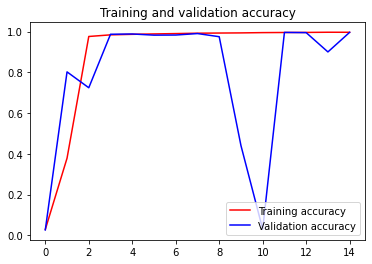

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()